In [3]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_excel("data_kuesioner.xlsx")

questions = [c for c in df.columns if c.startswith("Q")]

df.head()

,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


In [6]:
skala_order = ["SS","S","CS","CTS","TS","STS"]

score_map = {
    "SS":6, "S":5, "CS":4,
    "CTS":3, "TS":2, "STS":1
}

kategori_map = {
    "SS":"Positif",
    "S":"Positif",
    "CS":"Netral",
    "CTS":"Negatif",
    "TS":"Negatif",
    "STS":"Negatif"
}

In [5]:
long_df = df.melt(
    id_vars=["Partisipan"],
    value_vars=questions,
    var_name="Pertanyaan",
    value_name="Jawaban"
)

long_df.head()

,Partisipan,Pertanyaan,Jawaban
0,1,Q1,S
1,2,Q1,S
2,3,Q1,CS
3,4,Q1,S
4,5,Q1,CS


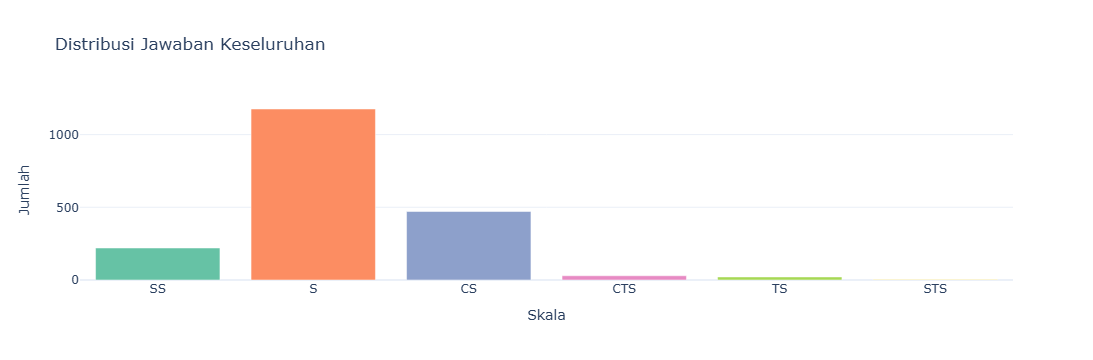

In [7]:
overall = long_df["Jawaban"].value_counts().reindex(skala_order)

fig1 = px.bar(
    x=overall.index,
    y=overall.values,
    title="Distribusi Jawaban Keseluruhan",
    labels={"x":"Skala", "y":"Jumlah"},
    color=overall.index,
    color_discrete_sequence=px.colors.qualitative.Set2,
    template="plotly_white"
)

fig1.update_layout(showlegend=False)
fig1.show()

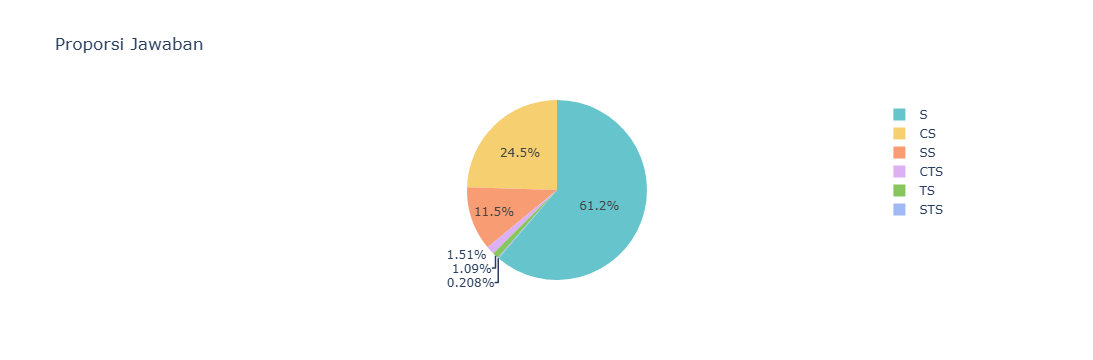

In [8]:
fig2 = px.pie(
    names=overall.index,
    values=overall.values,
    title="Proporsi Jawaban",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    template="plotly_white"
)

fig2.show()

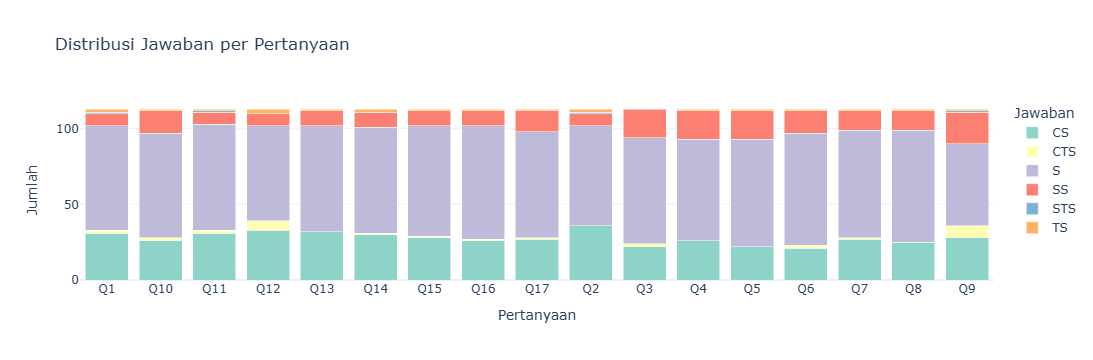

In [9]:
stack_df = (
    long_df.groupby(["Pertanyaan","Jawaban"])
    .size()
    .reset_index(name="Jumlah")
)

fig3 = px.bar(
    stack_df,
    x="Pertanyaan",
    y="Jumlah",
    color="Jawaban",
    barmode="stack",
    title="Distribusi Jawaban per Pertanyaan",
    color_discrete_sequence=px.colors.qualitative.Set3,
    template="plotly_white"
)

fig3.show()

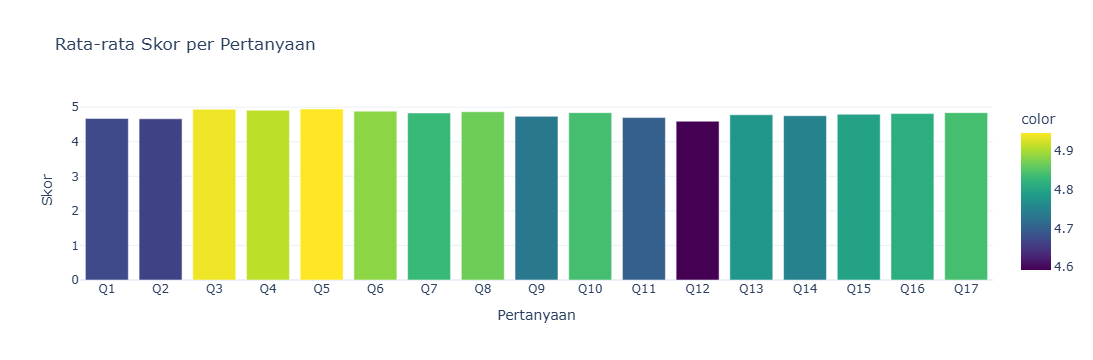

In [10]:
score_df = df[questions].apply(lambda col: col.map(score_map))
avg_scores = score_df.mean()

fig4 = px.bar(
    x=avg_scores.index,
    y=avg_scores.values,
    title="Rata-rata Skor per Pertanyaan",
    labels={"x":"Pertanyaan","y":"Skor"},
    color=avg_scores.values,
    color_continuous_scale="viridis",
    template="plotly_white"
)

fig4.show()

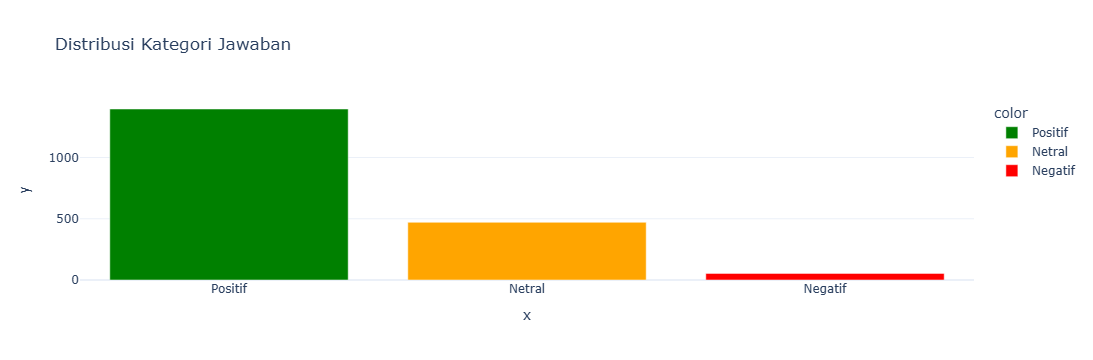

In [11]:
long_df["Kategori"] = long_df["Jawaban"].map(kategori_map)
cat_count = long_df["Kategori"].value_counts()

fig5 = px.bar(
    x=cat_count.index,
    y=cat_count.values,
    title="Distribusi Kategori Jawaban",
    color=cat_count.index,
    color_discrete_sequence=["green","orange","red"],
    template="plotly_white"
)

fig5.show()